# cadCAD Experiment


In [1]:
# if this crashes, run this:
# pip install ipython-autotime
%load_ext autotime
%load_ext autoreload
%autoreload 2
# import sys
# sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments

# from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline





time: 734 ms (started: 2021-08-13 14:21:23 -04:00)


In [2]:
from model import run

loaded GraphQL_data/SIstakeDelegateds.csv.
loaded GraphQL_data/SIstakeLockeds.csv.
loaded GraphQL_data/SIstakeWithdrawns.csv.
loaded GraphQL_data/SIallocationCloseds.csv.
loaded GraphQL_data/SIallocationCollecteds.csv.
loaded GraphQL_data/SIstakeDepositeds.csv.
running file: sim_setup.py
end of file: sim_setup.py
time: 188 ms (started: 2021-08-13 14:21:24 -04:00)


In [3]:
df = run.run()
import pickle
with open('experiment.p', 'wb') as f:
    pickle.dump(df, f)



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (90, 25, 1, 10)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
timestep=1 beginning...
timestep=2 beginning...
timestep=3 beginning...
timestep=4 beginning...
timestep=5 beginning...
timestep=6 beginning...
timestep=7 beginning...
timestep=8 beginning...
ACTION: DELEGATE (before)--
                delegator_id='0x63f8168f665f79101a0e0da2313cd1391e1c5e27', 
                pool_delegated_stake=Decimal('0'),
                shares=0,
                delegator.holdings=Decimal('10000000000'), 
                delegator.delegated_tokens=0, 
                delegator.undelegated_tokens=0, 
    

In [4]:
df

,id_indexer,pool_delegated_stake,pool_locked_stake,shares,delegators,GRT,indexing_revenue,query_revenue,cumulative_non_indexer_revenue,cumulative_deposited_stake,simulation,subset,run,substep,timestep
6,indexer,0,0,0,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,0,1,6,1
12,indexer,0,0,0,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,0,1,6,2
18,indexer,0,0,0,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,0,1,6,3
24,indexer,0,0,0,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,0,1,6,4
30,indexer,0,0,0,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,0,1,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,indexer,353448.8139238973942388878710,0,61741.90091656039862090086110,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,1277934.318668922850495257,0,0,1,6,86
522,indexer,353448.8139238973942388878710,0,61741.90091656039862090086110,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,1277934.318668922850495257,0,0,1,6,87
528,indexer,353448.8139238973942388878710,0,61741.90091656039862090086110,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,1277934.318668922850495257,0,0,1,6,88
534,indexer,353448.8139238973942388878710,0,61741.90091656039862090086110,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,1277934.318668922850495257,0,0,1,6,89


time: 78 ms (started: 2021-08-13 14:21:24 -04:00)


# Revenue coming in each period.  
## Indexing rewards and query rewards come in as an event stream.

<AxesSubplot:>

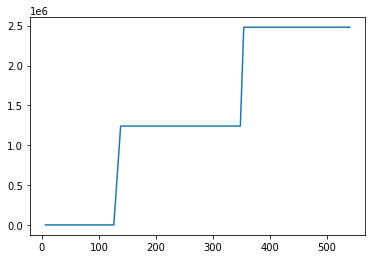

time: 344 ms (started: 2021-08-13 14:21:25 -04:00)


In [5]:
df.GRT.astype(float).plot()

<AxesSubplot:>

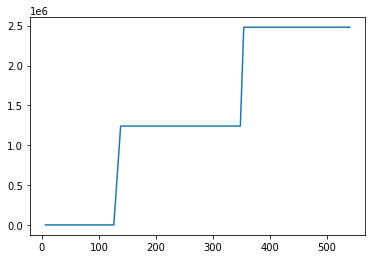

time: 219 ms (started: 2021-08-13 14:21:25 -04:00)


In [6]:
df.indexing_revenue.astype(float).plot()

<AxesSubplot:>

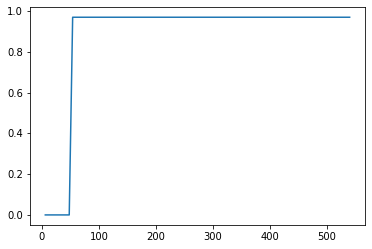

time: 188 ms (started: 2021-08-13 14:21:25 -04:00)


In [7]:
df.query_revenue.astype(float).plot()

# Cumulative Claimed Rewards
This shows that the cumulative rewards continues to rise even though each delegator eventually leaves the system and their rewards become fixed.  They are of similar heights (ie. same rewards) because they all use the same policies to join and leave.

In [8]:
import pandas as pd
df1 = df.reset_index().delegators

delegator_holdings = {}
delegator_shares = {}
timestep = 0
for delegator_dict in df1:
    for delegator_id, delegator in delegator_dict.items():
        if delegator_id not in delegator_holdings:
            delegator_holdings[delegator_id] = {}
            delegator_shares[delegator_id] = {}
        delegator_holdings[delegator_id][timestep] = float(delegator.holdings)
        delegator_shares[delegator_id][timestep] = float(delegator.shares)
    timestep += 1

time: 47 ms (started: 2021-08-13 14:21:25 -04:00)


# Shares broken down by Delegator

In [9]:
# resultset = [value for key, value in your_dict.items() if key not in your_blacklisted_set]

time: 47 ms (started: 2021-08-13 14:21:26 -04:00)


Text(0, 0.5, 'Delegator Shares')

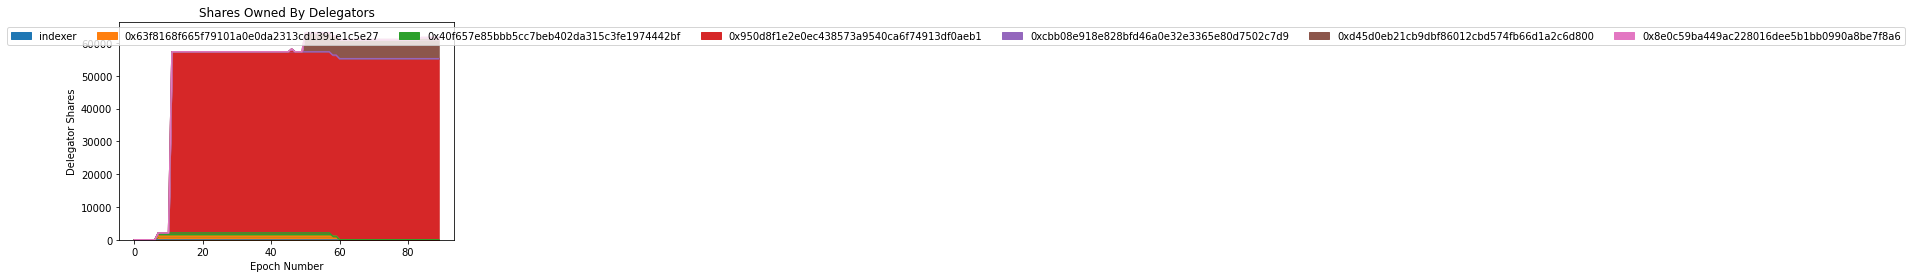

time: 485 ms (started: 2021-08-13 14:21:26 -04:00)


In [10]:


df_plot = pd.DataFrame(delegator_shares)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Shares Owned By Delegators')
plt.xlabel('Epoch Number')
plt.ylabel('Delegator Shares')

# Cumulative Revenue Token Holdings



Text(0, 0.5, 'Revenue Token Holdings')

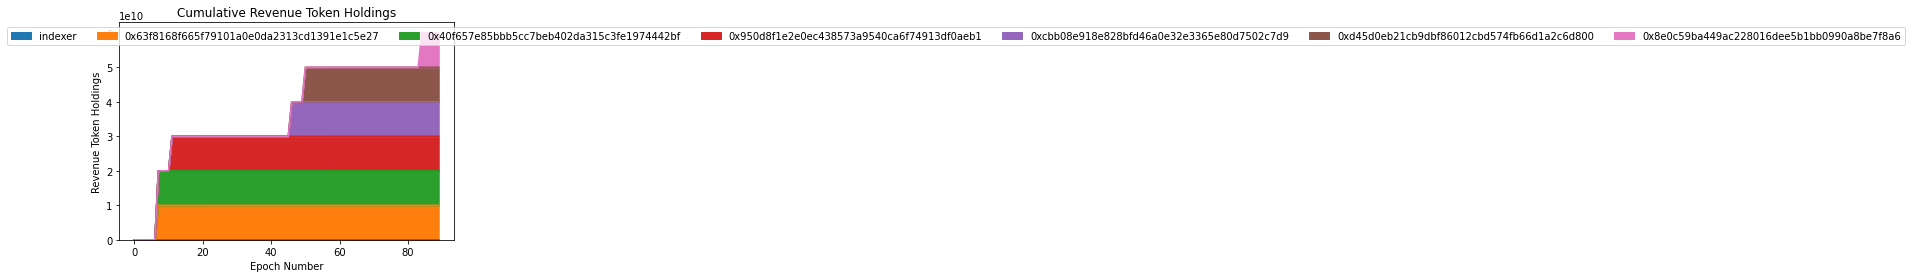

time: 390 ms (started: 2021-08-13 14:21:26 -04:00)


In [11]:
df_plot = pd.DataFrame(delegator_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Cumulative Revenue Token Holdings')
plt.xlabel('Epoch Number')
plt.ylabel('Revenue Token Holdings')

Exploratory data analysis

In [12]:
df['shareholders'] = df.delegators.apply(lambda x: [k for k in x.keys() if x[k].shares>0] )

time: 63 ms (started: 2021-08-13 14:21:27 -04:00)


In [13]:
df['total_shares'] = df.delegators.apply(lambda x: [x[k].shares for k in x.keys() if x[k].shares>0] )

time: 47 ms (started: 2021-08-13 14:21:27 -04:00)


In [14]:
df_list = []
for t in range(len(df)):
    temp_df = pd.DataFrame({'shareholder':df.shareholders.iloc[t] , 'shares':df.total_shares.iloc[t]})
    temp_df['Epoch Number'] = t

    df_list.append(temp_df)

shareholder_df = pd.concat(df_list)

time: 109 ms (started: 2021-08-13 14:21:27 -04:00)


In [15]:
shareholder_df

,shareholder,shares,Epoch Number
0,0x63f8168f665f79101a0e0da2313cd1391e1c5e27,1094.500000000000000000,7
1,0x40f657e85bbb5cc7beb402da315c3fe1974442bf,995.0000000000000000000000000,7
0,0x63f8168f665f79101a0e0da2313cd1391e1c5e27,1094.500000000000000000,8
1,0x40f657e85bbb5cc7beb402da315c3fe1974442bf,995.0000000000000000000000000,8
0,0x63f8168f665f79101a0e0da2313cd1391e1c5e27,1094.500000000000000000,9
...,...,...,...
0,0x63f8168f665f79101a0e0da2313cd1391e1c5e27,4.8223E-14,89
1,0x40f657e85bbb5cc7beb402da315c3fe1974442bf,9.6370000000E-15,89
2,0x950d8f1e2e0ec438573a9540ca6f74913df0aeb1,55219.67985174618088797947460,89
3,0xd45d0eb21cb9dbf86012cbd574fb66d1a2c6d800,5825.113211893787079906579872,89


time: 62 ms (started: 2021-08-13 14:21:27 -04:00)


# Pool Delegated Stake


In [16]:
df.pool_delegated_stake[:20]

6                                  0
12                                 0
18                                 0
24                                 0
30                                 0
36                                 0
42                                 0
48           2089.500000000000000000
54     2089.606713762053234595765337
60     2089.606713762053234595765337
66     2089.606713762053234595765337
72     57312.10671376205323459576534
78     57312.10671376205323459576534
84     57312.10671376205323459576534
90     57312.10671376205323459576534
96     57312.10671376205323459576534
102    57312.10671376205323459576534
108    57312.10671376205323459576534
114    57312.10671376205323459576534
120    57312.10671376205323459576534
Name: pool_delegated_stake, dtype: object

time: 47 ms (started: 2021-08-13 14:21:27 -04:00)


In [17]:
# df['period_revenue_per_share'] = df.period_revenue/df.shares
# df.period_revenue

time: 47 ms (started: 2021-08-13 14:21:27 -04:00)


In [18]:
df

,id_indexer,pool_delegated_stake,pool_locked_stake,shares,delegators,GRT,indexing_revenue,query_revenue,cumulative_non_indexer_revenue,cumulative_deposited_stake,simulation,subset,run,substep,timestep,shareholders,total_shares
6,indexer,0,0,0,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,0,1,6,1,[],[]
12,indexer,0,0,0,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,0,1,6,2,[],[]
18,indexer,0,0,0,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,0,1,6,3,[],[]
24,indexer,0,0,0,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,0,1,6,4,[],[]
30,indexer,0,0,0,{'indexer': <model.parts.delegator.Delegator o...,0,0,0,0,0,0,0,1,6,5,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,indexer,353448.8139238973942388878710,0,61741.90091656039862090086110,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,1277934.318668922850495257,0,0,1,6,86,"[0x63f8168f665f79101a0e0da2313cd1391e1c5e27, 0...","[4.8223E-14, 9.6370000000E-15, 55219.679851746..."
522,indexer,353448.8139238973942388878710,0,61741.90091656039862090086110,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,1277934.318668922850495257,0,0,1,6,87,"[0x63f8168f665f79101a0e0da2313cd1391e1c5e27, 0...","[4.8223E-14, 9.6370000000E-15, 55219.679851746..."
528,indexer,353448.8139238973942388878710,0,61741.90091656039862090086110,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,1277934.318668922850495257,0,0,1,6,88,"[0x63f8168f665f79101a0e0da2313cd1391e1c5e27, 0...","[4.8223E-14, 9.6370000000E-15, 55219.679851746..."
534,indexer,353448.8139238973942388878710,0,61741.90091656039862090086110,{'indexer': <model.parts.delegator.Delegator o...,2480000.000000000000000000,2480000.000000000000000000,0.970125109574860079,272800.1067137620201943585525,1277934.318668922850495257,0,0,1,6,89,"[0x63f8168f665f79101a0e0da2313cd1391e1c5e27, 0...","[4.8223E-14, 9.6370000000E-15, 55219.679851746..."


time: 62 ms (started: 2021-08-13 14:21:27 -04:00)
